In [1]:
using Distributions
using Random
using StatsBase
using StatsPlots
default(fmt=:png)

function MyLogNormal(m, s)
    σ² = log(1 + s^2/m^2)
    μ = log(m) - σ²/2
    LogNormal(μ, √σ²)
end

distname(dist) = replace(string(dist), r"{[^\}]*}"=>"")

function distname(dist::LocationScale)
    μ, σ, ρ = params(dist)
    m = μ != 0 ? "$μ + " : ""
    s = σ != 1 ? "$σ " : ""
    m * s * distname(ρ)
end

distname (generic function with 2 methods)

In [2]:
function plot_tstats(; distx, m, disty, n, L=10^6, kwargs...)
    Xtmp = [Vector{eltype(distx)}(undef, m) for _ in 1:Threads.nthreads()]
    Ytmp = [Vector{eltype(disty)}(undef, n) for _ in 1:Threads.nthreads()]
    T = Vector{Float64}(undef, L)
    DF = similar(T)
    Pval = similar(T)
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(distx, Xtmp[tid])
        Y = rand!(disty, Ytmp[tid])
        X̄ = mean(X)
        Ȳ = mean(Y)
        sx2 = var(X)
        sy2 = var(Y)
        t = (X̄ - Ȳ)/√(sx2/m + sy2/n)
        T[i] = t
        df = (sx2/m + sy2/n)^2 / ((sx2/m)^2/(m-1) + (sy2/n)^2/(n-1))
        DF[i] = df
        pval = 2ccdf(TDist(df), abs(t))
        Pval[i] = pval
    end
    
    DFmin, DFmax = minimum(DF), maximum(DF)
    _ecdfPval = ecdf(Pval)
    ecdfPval(x) = _ecdfPval(x)
    
    println(distname(distx))
    @show m mean(distx) std(distx)
    println()
    println(distname(disty))
    @show n mean(disty) std(disty)
    println()
    @show DFmin DFmax
    @show ecdfPval(0.05)
    
    P = stephist(T; norm=true, label="t-statistics", lw=1.5, kwargs...)
    plot!(TDist(DFmax); label="", ls=:dash)
    plot!(TDist(DFmin); label="", ls=:dashdot)
    
    T2 = T .^ 2
    _ecdfT2 = ecdf(T2)
    ecdfT2(x) = _ecdfT2(x)
    Q = plot(ecdfT2, 0, 20; label="t²", lw=1.5)
    plot!(x -> cdf(FDist(1, DFmax), x), 0, 20; label="", ls=:dash)
    plot!(x -> cdf(FDist(1, DFmin), x), 0, 20; label="", ls=:dashdot)
    plot!(xlim=(3.5, 8), ylim=(0.9, 1.01))
    plot!(ytick=0:0.01:1)
    
    plot(P, Q; size=(1000, 300))
end

plot_tstats (generic function with 1 method)

Normal(μ=0.0, σ=1.0)
m = 20
mean(distx) = 0.0
std(distx) = 1.0

Normal(μ=0.0, σ=2.0)
n = 40
mean(disty) = 0.0
std(disty) = 2.0

DFmin = 32.179253247265144
DFmax = 57.999999999999886
ecdfPval(0.05) = 0.049949


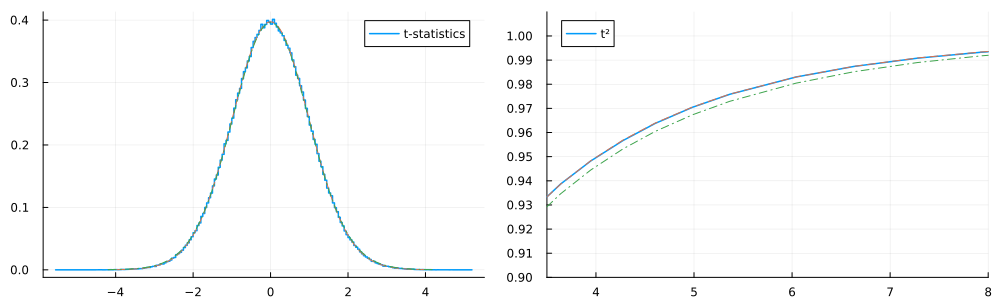

In [3]:
plot_tstats(distx=Normal(), m=20, disty=Normal(0, 2), n=40)

Normal(μ=0.0, σ=1.0)
m = 60
mean(distx) = 0.0
std(distx) = 1.0

Normal(μ=0.0, σ=2.0)
n = 20
mean(disty) = 0.0
std(disty) = 2.0

DFmin = 19.63111876824721
DFmax = 58.231457993644476
ecdfPval(0.05) = 0.049903


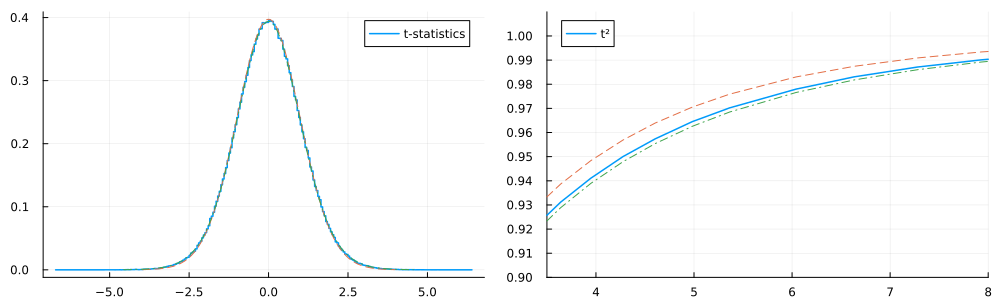

In [4]:
plot_tstats(distx=Normal(), m=60, disty=Normal(0, 2), n=20)

Normal(μ=0.0, σ=1.0)
m = 40
mean(distx) = 0.0
std(distx) = 1.0

Normal(μ=0.0, σ=2.0)
n = 20
mean(disty) = 0.0
std(disty) = 2.0

DFmin = 19.81843219229403
DFmax = 51.84494128347668
ecdfPval(0.05) = 0.05015


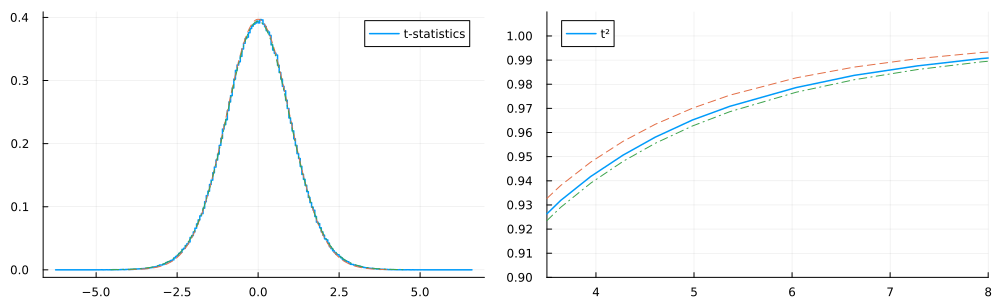

In [5]:
plot_tstats(distx=Normal(), m=40, disty=Normal(0, 2), n=20)

LogNormal(μ=0.0, σ=1.0)
m = 30
mean(distx) = 1.6487212707001282
std(distx) = 2.1611974158950877

LogNormal(μ=0.0, σ=1.0)
n = 30
mean(disty) = 1.6487212707001282
std(disty) = 2.1611974158950877

DFmin = 29.037421452804466
DFmax = 57.9999999999999
ecdfPval(0.05) = 0.038958


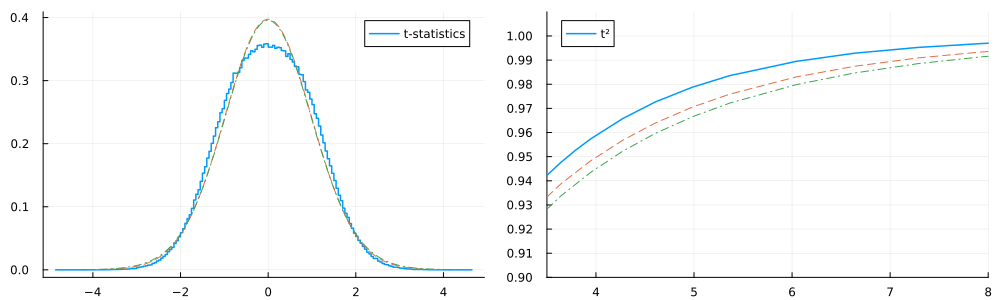

In [6]:
plot_tstats(distx=LogNormal(), m=30, disty=LogNormal(), n=30)

LogNormal(μ=0.0, σ=1.0)
m = 40
mean(distx) = 1.6487212707001282
std(distx) = 2.1611974158950877

LogNormal(μ=0.0, σ=1.0)
n = 20
mean(disty) = 1.6487212707001282
std(disty) = 2.1611974158950877

DFmin = 19.011180475458453
DFmax = 57.99999999999272
ecdfPval(0.05) = 0.050036


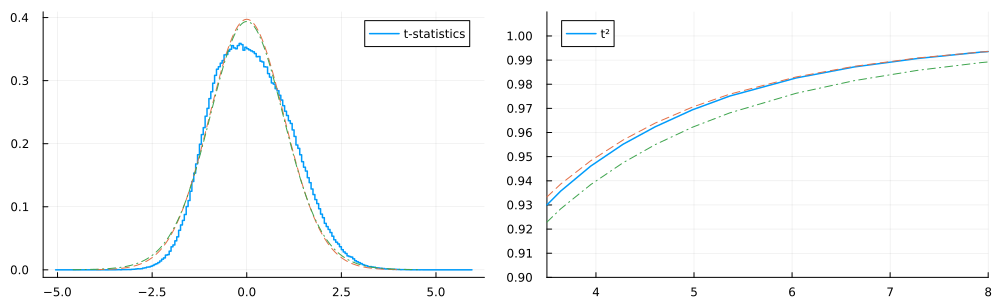

In [7]:
plot_tstats(distx=LogNormal(), m=40, disty=LogNormal(), n=20)

LogNormal(μ=0.0, σ=1.0)
m = 60
mean(distx) = 1.6487212707001282
std(distx) = 2.1611974158950877

LogNormal(μ=0.0, σ=1.0)
n = 20
mean(disty) = 1.6487212707001282
std(disty) = 2.1611974158950877

DFmin = 19.0112964795276
DFmax = 77.99999999962643
ecdfPval(0.05) = 0.064871


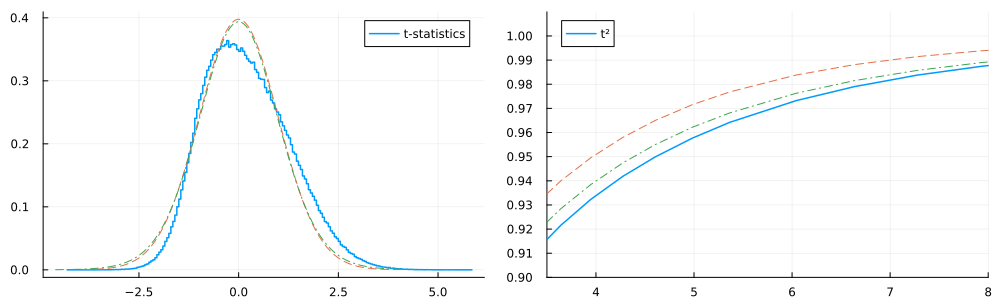

In [8]:
plot_tstats(distx=LogNormal(), m=60, disty=LogNormal(), n=20)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 20
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 40
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 19.08760295893377
DFmax = 57.99999999999942
ecdfPval(0.05) = 0.048031


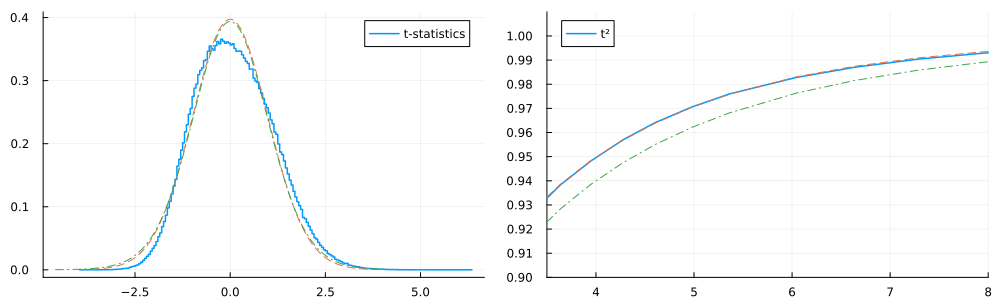

In [9]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=20, disty=2(LogNormal()-mean(LogNormal())), n=40)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 30
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 30
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 29.010647940925097
DFmax = 57.999999999726185
ecdfPval(0.05) = 0.070734


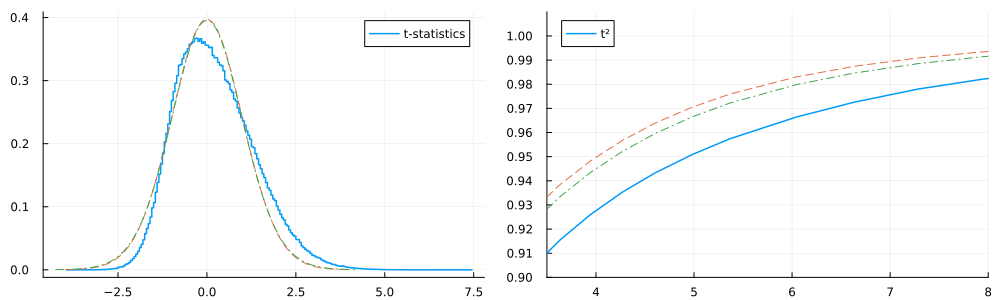

In [10]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=30, disty=2(LogNormal()-mean(LogNormal())), n=30)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 40
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 20
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 19.005590990550605
DFmax = 57.99999999915818
ecdfPval(0.05) = 0.099881


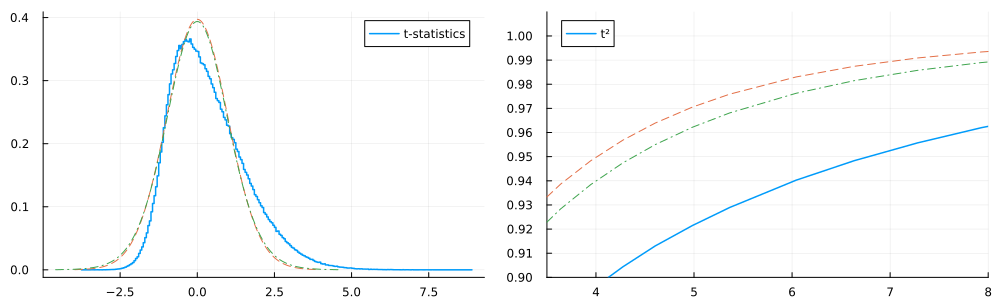

In [11]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=40, disty=2(LogNormal()-mean(LogNormal())), n=20)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 300
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 300
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 299.89482581909573
DFmax = 597.999999979722
ecdfPval(0.05) = 0.05437


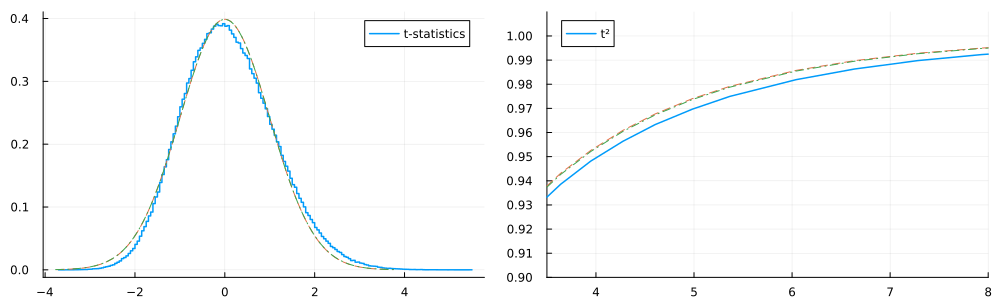

In [12]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=300, disty=2(LogNormal()-mean(LogNormal())), n=300)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 400
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 200
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 199.5114869162632
DFmax = 597.9999219342805
ecdfPval(0.05) = 0.062595


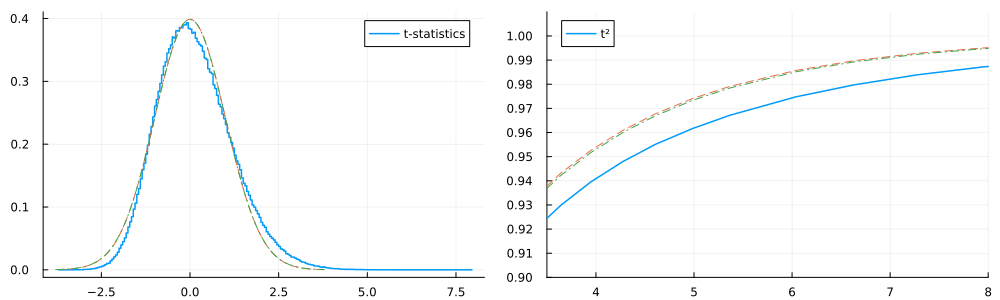

In [13]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=400, disty=2(LogNormal()-mean(LogNormal())), n=200)

Normal(μ=2.0, σ=1.0)
m = 20
mean(distx) = 2.0
std(distx) = 1.0

Normal(μ=2.8, σ=1.0)
n = 40
mean(disty) = 2.8
std(disty) = 1.0

DFmin = 21.782646121585746
DFmax = 57.99999992221007
ecdfPval(0.05) = 0.811785


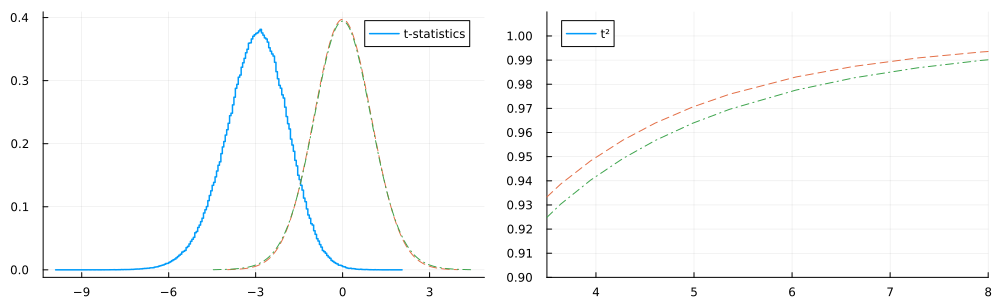

In [14]:
plot_tstats(distx=Normal(2), m=20, disty=Normal(2.8), n=40)

LogNormal(μ=0.0, σ=1.0)
m = 20
mean(distx) = 1.6487212707001282
std(distx) = 2.1611974158950877

1.7289579327160702 + LogNormal(μ=0.0, σ=1.0)
n = 40
mean(disty) = 3.377679203416198
std(disty) = 2.1611974158950877

DFmin = 19.009523987691207
DFmax = 57.99999999998527
ecdfPval(0.05) = 0.822567


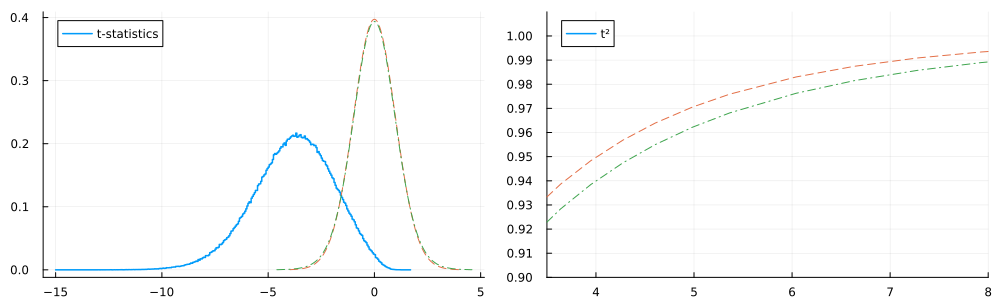

In [15]:
plot_tstats(distx=LogNormal(), m=20, disty=LogNormal()+0.8*std(LogNormal()), n=40)

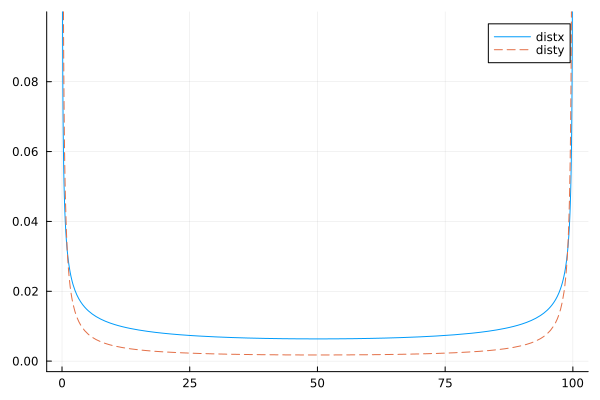

In [16]:
plot(100Beta(0.5, 0.5); label="distx")
plot!(100Beta(0.1, 0.1); label="disty", ls=:dash)
plot!(ylim=(-0.003, 0.1))

100.0 Beta(α=0.5, β=0.5)
m = 10
mean(distx) = 50.0
std(distx) = 35.35533905932738

100.0 Beta(α=0.1, β=0.1)
n = 10
mean(disty) = 50.0
std(disty) = 45.64354645876384

DFmin = 9.00000281035361
DFmax = 18.0
ecdfPval(0.05) = 0.052104


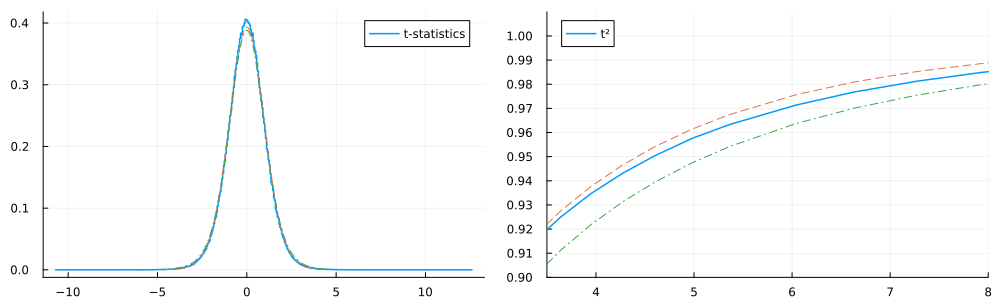

In [17]:
plot_tstats(distx=100Beta(0.5, 0.5), m=10, disty=100Beta(0.1, 0.1), n=10)

100.0 Beta(α=0.5, β=0.5)
m = 20
mean(distx) = 50.0
std(distx) = 35.35533905932738

100.0 Beta(α=0.1, β=0.1)
n = 10
mean(disty) = 50.0
std(disty) = 45.64354645876384

DFmin = 9.548942969842019
DFmax = 27.999999970064252
ecdfPval(0.05) = 0.055362


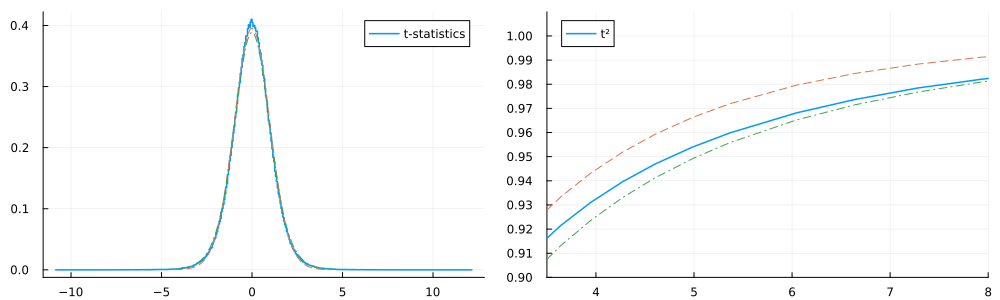

In [18]:
plot_tstats(distx=100Beta(0.5, 0.5), m=20, disty=100Beta(0.1, 0.1), n=10)

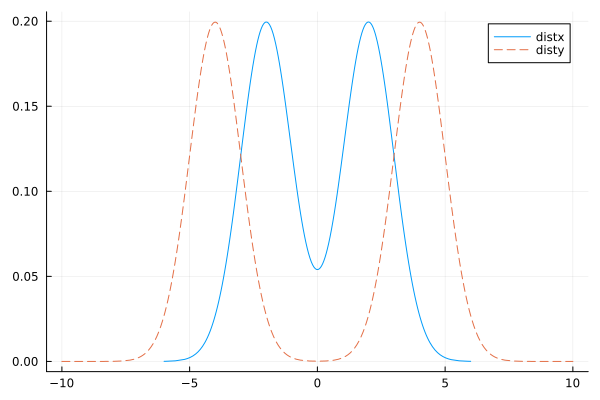

In [19]:
distx = MixtureModel([Normal(-2), Normal(2)], [0.5, 0.5])
disty = MixtureModel([Normal(-4), Normal(4)], [0.5, 0.5])

plot(x -> pdf(distx, x), -6, 6; label="distx")
plot!(x -> pdf(disty, x), -10, 10; label="disty", ls=:dash)

MixtureModel}(K = 2)
components[1] (prior = 0.5000): Normal(μ=-2.0, σ=1.0)
components[2] (prior = 0.5000): Normal(μ=2.0, σ=1.0)

m = 10
mean(distx) = 0.0
std(distx) = 2.23606797749979

MixtureModel}(K = 2)
components[1] (prior = 0.5000): Normal(μ=-4.0, σ=1.0)
components[2] (prior = 0.5000): Normal(μ=4.0, σ=1.0)

n = 10
mean(disty) = 0.0
std(disty) = 4.123105625617661

DFmin = 9.090757980942657
DFmax = 17.999999999995364
ecdfPval(0.05) = 0.05447


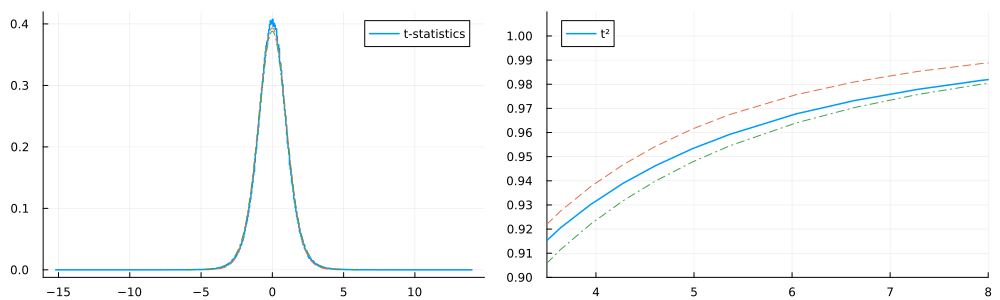

In [20]:
plot_tstats(; distx, m=10, disty, n=10)

MixtureModel}(K = 2)
components[1] (prior = 0.5000): Normal(μ=-2.0, σ=1.0)
components[2] (prior = 0.5000): Normal(μ=2.0, σ=1.0)

m = 20
mean(distx) = 0.0
std(distx) = 2.23606797749979

MixtureModel}(K = 2)
components[1] (prior = 0.5000): Normal(μ=-4.0, σ=1.0)
components[2] (prior = 0.5000): Normal(μ=4.0, σ=1.0)

n = 10
mean(disty) = 0.0
std(disty) = 4.123105625617661

DFmin = 9.402796068618931
DFmax = 27.9999966235989
ecdfPval(0.05) = 0.055865


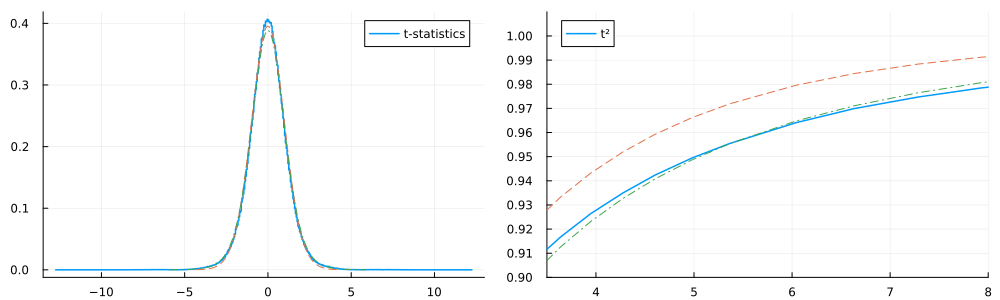

In [21]:
plot_tstats(; distx, m=20, disty, n=10)

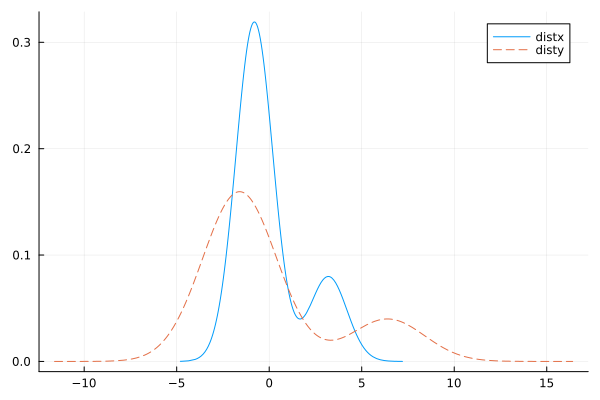

In [22]:
distx = MixtureModel([Normal(-2+1.2), Normal(2+1.2)], [0.8, 0.2])
disty = MixtureModel([Normal(-4+2.4, 2), Normal(4+2.4, 2)], [0.8, 0.2])

plot(x -> pdf(distx, x), -6+1.2, 6+1.2; label="distx")
plot!(x -> pdf(disty, x), -14+2.4, 14+2.4; label="disty", ls=:dash)

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-0.8, σ=1.0)
components[2] (prior = 0.2000): Normal(μ=3.2, σ=1.0)

m = 10
mean(distx) = 0.0
std(distx) = 1.886796226411321

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-1.6, σ=2.0)
components[2] (prior = 0.2000): Normal(μ=6.4, σ=2.0)

n = 10
mean(disty) = 0.0
std(disty) = 3.773592452822642

DFmin = 9.031952334888917
DFmax = 17.999999999976946
ecdfPval(0.05) = 0.062424


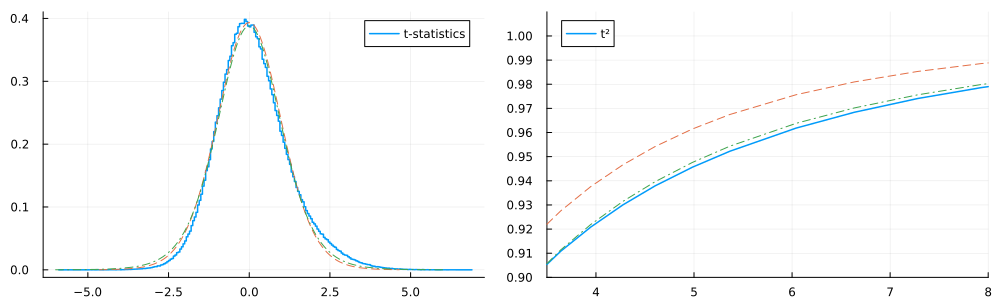

In [23]:
plot_tstats(; distx, m=10, disty, n=10)

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-0.8, σ=1.0)
components[2] (prior = 0.2000): Normal(μ=3.2, σ=1.0)

m = 20
mean(distx) = 0.0
std(distx) = 1.886796226411321

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-1.6, σ=2.0)
components[2] (prior = 0.2000): Normal(μ=6.4, σ=2.0)

n = 20
mean(disty) = 0.0
std(disty) = 3.773592452822642

DFmin = 19.420110267611292
DFmax = 37.99999999999994
ecdfPval(0.05) = 0.054669


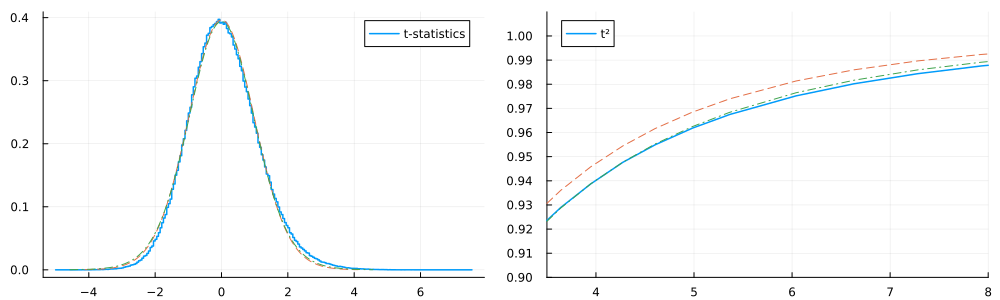

In [24]:
plot_tstats(; distx, m=20, disty, n=20)

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-0.8, σ=1.0)
components[2] (prior = 0.2000): Normal(μ=3.2, σ=1.0)

m = 30
mean(distx) = 0.0
std(distx) = 1.886796226411321

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-1.6, σ=2.0)
components[2] (prior = 0.2000): Normal(μ=6.4, σ=2.0)

n = 30
mean(disty) = 0.0
std(disty) = 3.773592452822642

DFmin = 30.143832036372892
DFmax = 57.99999999625988
ecdfPval(0.05) = 0.052707


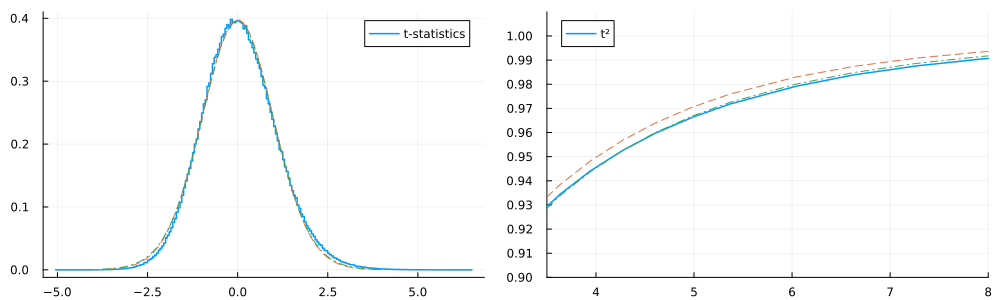

In [25]:
plot_tstats(; distx, m=30, disty, n=30)

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-0.8, σ=1.0)
components[2] (prior = 0.2000): Normal(μ=3.2, σ=1.0)

m = 40
mean(distx) = 0.0
std(distx) = 1.886796226411321

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-1.6, σ=2.0)
components[2] (prior = 0.2000): Normal(μ=6.4, σ=2.0)

n = 40
mean(disty) = 0.0
std(disty) = 3.773592452822642

DFmin = 41.23124787451057
DFmax = 77.99999999890485
ecdfPval(0.05) = 0.052321


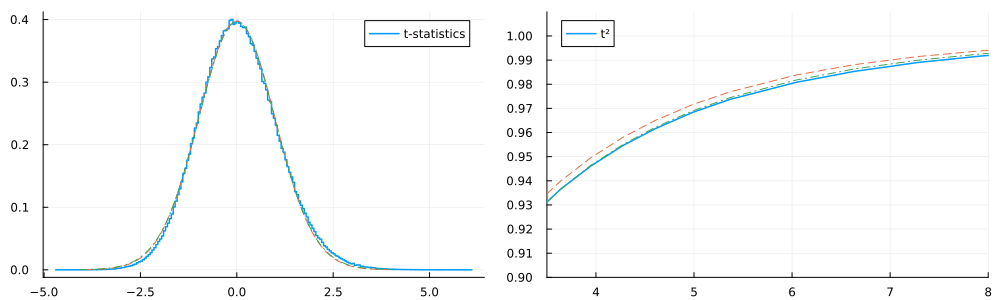

In [26]:
plot_tstats(; distx, m=40, disty, n=40)

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-0.8, σ=1.0)
components[2] (prior = 0.2000): Normal(μ=3.2, σ=1.0)

m = 100
mean(distx) = 0.0
std(distx) = 1.886796226411321

MixtureModel}(K = 2)
components[1] (prior = 0.8000): Normal(μ=-1.6, σ=2.0)
components[2] (prior = 0.2000): Normal(μ=6.4, σ=2.0)

n = 100
mean(disty) = 0.0
std(disty) = 3.773592452822642

DFmin = 114.97943072826719
DFmax = 194.45356982738247
ecdfPval(0.05) = 0.051044


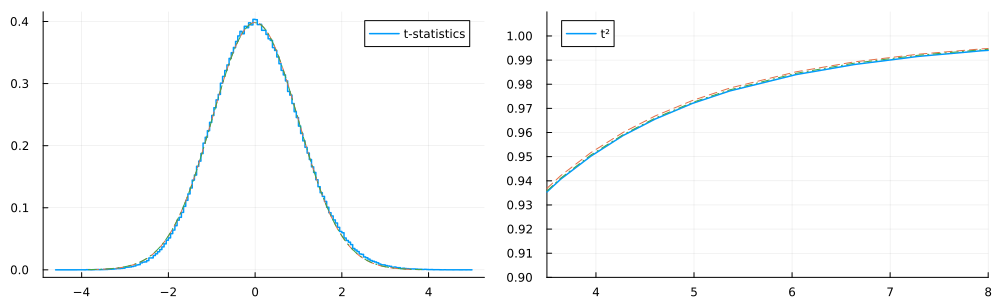

In [27]:
plot_tstats(; distx, m=100, disty, n=100)